## Trabajo Practico Algebra Lineal Computacional

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import time

# Ejercicio 1

In [24]:
def generar_matriz(J):
    unos = np.ones(J) #es un vector de unos de 10 casilleros
    A    = np.diag(-2*unos)
    B    = np.diag(unos[1:],1) # le paso un vector de 1s de 9 casilleros, así el resultado queda de 10x10
    C    = np.diag(unos[1:],-1)

    A    = A+B+C
    return A

# Ejercicio 2

### Ejercicio 13

In [3]:
# dado un 'L' y un 'b' resuelve Lx = b
def res_L(L, b):
    y = np.zeros(len(b))
    for i in range(len(b)):
        y[i] = ( b[i] - (L[i, :i] @ y[:i]) ) / L[i,i]
    return y


#Dado un 'U' y un 'y' resuelve Ux = y
def res_U(U, y):
    x = np.zeros(len(y))
    n = len(x)-1
    
    x[n] = y[n]/U[n,n]
    n = n-1
    while n >= 0:
        x[n] = (y[n] - (U[n, n+1:] @ x[n+1:])) / U[n, n]
        n = n-1
    
    return x



### Ejercicio 16

In [4]:
# a

# Dada una Matriz A de nxn, me devuelve la descomposicion LU de A (A = LU)
# Asumo que A no es necesario que haga pivoteos
def LU(A):
    L = np.eye(A.shape[0])
    U = A.copy().astype(float)
    
    for i in range(A.shape[0]):
        for j in range(i+1, A.shape[0]):
            L[j,i] =  U[j,i]/U[i,i]
            U[j, i:] = U[j,i:] - (U[j,i]/U[i,i]) * U[i,i:]
            
        
    return  L,U

#b 

def resolver_sistema(A, b):
    L, U = LU(A)
    
    y = res_L(L, b)
    x = res_U(U, y)
    
    return x
    

In [90]:
# Testeo

A = np.array([[1.,3.,0.],[7.,1.,2.],[8.,10.,1.]])
b = np.random.random(3)

x = resolver_sistema(A,b)

print('A*x - b tendria que darme el vector 0 \n', A@x - b) 

A*x - b tendria que darme el vector 0 
 [ 1.11022302e-16 -1.99840144e-15 -6.66133815e-16]


# Ejercicio 4
Descomposición LU de una matriz A tridiagonal

In [6]:
def lu_tridiagonal(A):
    n = len(A)
    L = np.identity(n)
    U = A.copy()            
    
    for i in range(1, n):
        c = U[i][i-1]/U[i-1][i-1]
        L[i][i-1] = c
        U[i][i-1:i+1] = U[i][i-1:i+1] - c*(U[i-1][i-1:i+1])        
    
    return L, U

In [7]:
# Testeo

A = np.array([[1,1,0,0],[3,7,3,0],[0,8,8,4],[0,0,2,-3]])
print(A)

L, U = lu_tridiagonal(A)
print(np.matmul(L,U))

[[ 1  1  0  0]
 [ 3  7  3  0]
 [ 0  8  8  4]
 [ 0  0  2 -3]]
[[ 1.  1.  0.  0.]
 [ 3.  7.  3.  0.]
 [ 0.  8.  8.  4.]
 [ 0.  0.  2. -3.]]


# Ejercicio 5 

In [8]:
# Dada una Matriz L bidiagonal inferior, con unos en la diagonal principal
# resuelve Ly = b

def res_L_reducido(L, b):
    m    = len(b)
    y    = np.zeros(m)
    y[0] = b[0]                         # Separo caso 
    for i in range(1, m):
        y[i] = b[i] - L[i, i-1] * y[i-1]
    
    return y

# Dada una Matriz U bidiagonal superior, la afuncion resuelve Ux=y
def res_U_reducido(U, y):
    m      = len(y)
    x      = np.zeros(m)
    x[m-1] = y[m-1]/U[m-1, m-1]         # Separo caso 
    for i in range(m-2, -1, -1):        # realiza un for en sentido contrario
        x[i] = (y[i] - U[i, i+1] * x[i+1]) / U[i,i]
    
    return x

In [86]:
# Testeo
#Construyamos la matriz:
J = 10

A = generar_matriz(J)

unos = np.ones(J) #es un vector de unos de 10 casilleros
l, u = LU(A)
b    = np.random.random(J)

yres = res_L_reducido(l, b)
xres = res_U_reducido(u, yres)
y    = res_L(l, b)
x    = res_U(u, y)

print(y - yres) # qvq el resultado me de 0
print(x - xres)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Ejercicio 6


In [11]:
def res_A_tridiagonal(A, b):
    L, U = lu_tridiagonal(A)
    y = res_L_reducido(L, b)
    x = res_U_reducido(U, y)
    return x

In [84]:
# Chequeo que ande --------> ANDA
J = 5
b = np.random.random(J)
A = generar_matriz(J)


print(A @ res_A_tridiagonal(A, b) - b)# qvq el resultado me de 0


[-2.22044605e-16  1.11022302e-16 -3.33066907e-16  2.22044605e-16
  0.00000000e+00]


# Ejercicio 7

In [13]:
def generar_A_vec(d, ds, di):
    A = np.diag(d)
    B = np.diag(ds,1)         # diagonal superior
    C = np.diag(di, -1)
    A = A+B+C
    
    return A

def res_sistema_tri(d, ds, di, b):
    A   = generar_A_vec(d, ds, di)
    res = res_A_tridiagonal(A,b)

    return res

In [79]:
# Testeo

b = np.random.random(5)

unos = np.ones(5) #es un vector de unos de 10 casilleros
D    = -2*unos
D_S    = unos[1:] # le paso un vector de 1s de 9 casilleros, así el resultado queda de 10x10
D_I    = unos[1:]

print(res_sistema_tri(D,D_S,D_I, b))
print(np.linalg.solve(generar_A_vec(D,D_S,D_I), b))
# Funciona 


[-1.13169756 -1.95744643 -2.27289859 -2.34064939 -1.48399055]
[-1.13169756 -1.95744643 -2.27289859 -2.34064939 -1.48399055]


# Ejercicio 8

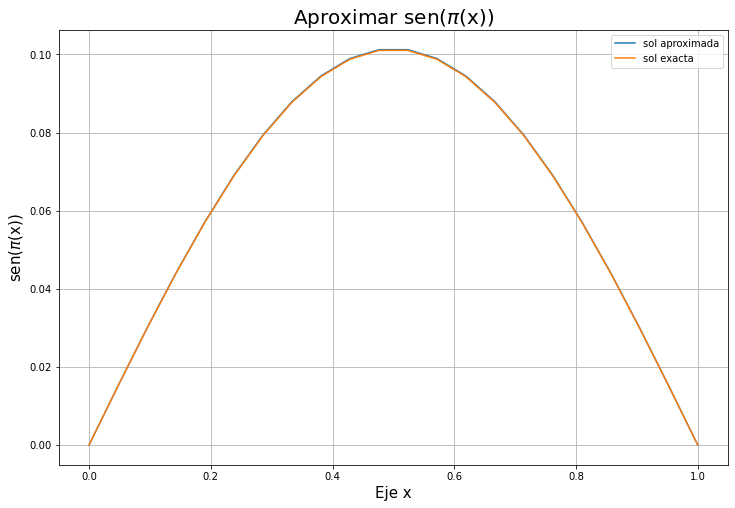

In [94]:
J = 20
f = lambda t : np.sin(np.pi * t)
x = np.linspace(0, 1, J+2) #J puntos interiores + los dos extremos
h = x[1]
b = f(x[1:-1])
A = (-1/h**2) * generar_matriz(J)
u = np.zeros(J+2)
u [1:-1] = res_A_tridiagonal(A, b)

# Tuneo el plot
plt.figure(figsize=(12,8))

plt.plot(x, u, label='sol aproximada') #Sol aproximada


U = lambda t : np.sin(np.pi * t) /np.pi**2 #solexacta
plt.plot (x,U(x), label='sol exacta') # Sol exacta 

plt.title('Aproximar sen($\pi$(x))', size=20)
plt.xlabel('Eje x', size=15)
plt.ylabel('sen($\pi$(x))', size=15)
plt.legend()
plt.grid()
plt.show()

# Ejercicio 9

In [71]:
def comparar_tiempos():
    J = 20
    f = lambda t : np.sin (np.pi * t)
    j_vec = np.linspace(100, 1001, 100) #J puntos interiores + los dos extremos
    N = len(j_vec)
    b = f(j_vec[1:-1])

    
    t_lu = np.zeros(N)
    t_trid = (np.zeros(N))
    for i in range(N):
        j = int(j_vec[i])
        x = np.linspace(0, 1, j+2) #J puntos interiores + los dos extremos
        h = x[1]
        b = f(x[1:-1])
        A =(-1/h**2) * generar_matriz(j)
        
        # Calculo tiempo de LU
        start1 = time.time()
        resolver_sistema(A, b)
        t_lu[i] = time.time() - start1
        
        # Calculo tiempo de LU reducido
        start2 = time.time()
        res_A_tridiagonal(A, b)
        t_trid[i] = time.time() - start2

        
    plt.figure(figsize=(12,8))
    plt.plot(j_vec, t_lu, label= 'LU')
    plt.plot(j_vec, t_trid, label='LU reducido')
    
    plt.title('LU vs. LU reducido', size=20)
    plt.xlabel('Tamaño de matriz', size=15)
    plt.ylabel('Tiempo', size=15)
    plt.legend()
    plt.grid()
    plt.show()

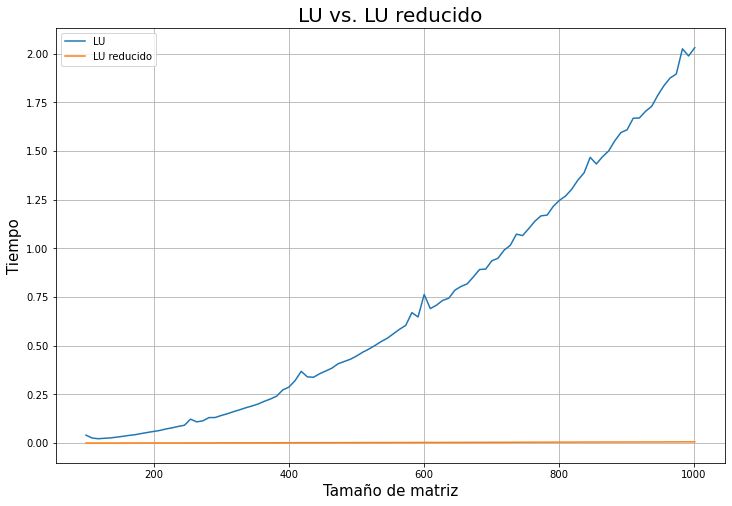

In [72]:
comparar_tiempos()